In [59]:
def str_to_int(item):
    """
    Assigns our string item an integer value
            
    Parameters:
    ------------
    - item: str
        an item we need to find integer value of
            
    Returns:
    -----------
    - total_sum: int
         integer value that correponds to our value
    """
    total_sum = 0
    multiplier = 1          #keeping track of the current multiplier
    for i in range(len(item)-1, -1, -1):
        total_sum += multiplier * ord(item[i])   #summing up all the products
        multiplier *= 151
    return total_sum

In [60]:
import math
primes = [101, 103, 107, 109, 113, 127, 131, 137, 139, 149]
class CountingBloomFilter():
    """
    A class that implements the counting bloom filter
    that has following attributes and methods:
    
    Attributes
    ------------
    - fpr: float
        false-positive rate of our filter
    - num_item: int
        number of items that are planned to be stored in our filter
    - memory_size: int
        length of the bit array of our filter
    - bit_array: lst
        bit array that represents a random distribution
    - num_hashfn: int
        number of hash functions used in our filter
    - self.primes: lst
        prime numbers that will be used to create hash functions
    
    Methods
    ------------
    - hash_cbf: produces a list of the hash values
    - search: queries the membership of an element
    - insert: inserts a string to the filter
    - delete: removes a string from the filter
    """
    
    def __init__(self, fpr, num_item):
        """
        initializes attributes of the CountingBloomFilter
        """
        self.fpr = fpr
        self.num_item = num_item
        #using formula to the memory size the most optimal
        self.memory_size = (-1) * round (((self.num_item) * math.log(fpr)) / (math.log(2) ** 2))
        #creating a bit array
        self.bit_array = [0] * self.memory_size
        #using formula to make the most optimal number of hash functions
        self.num_hashfn = round((self.memory_size / self.num_item) * math.log(2))
        #making sure that the number of hash functions lies between 1 and 10
        self.num_hashfn = min(10, max(self.num_hashfn, 1)) 
        #setting prime numbers for our cbf
        self.primes = primes[:self.num_hashfn]
        
    def hash_cbf(self, item, prev_hash = None):
        """
        Hashes a certain element with all of the hash functions in cbf
        
        Parameters:
        -------------
        - item: str
            a particular item that needs to get hashed
        - prev_hash:
            an optional parameter that would serve as a memoisation of previous item for rolling hash
        
        Returns:
        ------------
        - keys: lst
            list of the keys of the bit array that were produced by our hash functions
        """
        
        def str_to_int(item):
            """
            Assigns our string item an integer value
            
            Parameters:
            ------------
            - item: str
                an item we need to find integer value of
            
            Returns:
            -----------
            - total_sum: int
                integer value that correponds to our value
            """
            total_sum = 0
            multiplier = 1          #keeping track of the current multiplier
            for i in range(len(item)-1, -1, -1):
                total_sum += multiplier * ord(item[i])   #summing up all the products
                multiplier *= 151
            return total_sum
        
        keys = []
        if not prev_hash:     #if it is the first element in the text or we don't use rolling hashing
            for prime in self.primes:  #calculating each of the hash function's value
                multiplier = 1
                hash_value = 0
                for i in range(len(item)-1, -1, -1):
                    #adding new element
                    hash_value += (multiplier * str_to_int(item[i])) % self.memory_size 
                    hash_value %= self.memory_size
                    multiplier *= prime    #keeping track of the current multiplier
                if hash_value < 0:         #making sure our hash value is in the right range
                    hash_value += self.memory_size
                keys.append(hash_value)
        else:
            for i in range(len(self.primes)):
                #accessing current hash function and stored value
                prime = self.primes[i]
                current_hash = prev_hash[i]
                #adding new element at the end
                add_new = (current_hash * prime + str_to_int(item[-1])) % self.memory_size
                #removing old element from the beggining
                remove_old = (add_new - str_to_int(item[0]) * ((prime ** (len(item) - 1)) % self.memory_size)) % self.memory_size
                if remove_old < 0:  #making sure our element is in the correct range
                    remove_old += self.memory_size
                keys.append(remove_old)
        return keys
    
    def search(self, item, prev_hash = None):
        """
        Searches whether an element is in CBF or not
        
        Parameters:
        -------------
        - item: str
            a particular item that needs to be 
        - prev_hash:
            an optional parameter that would serve as a memoisation of previous item for rolling hash
        
        Returns:
        ------------
        - True/False: bool
            boolean that tell us whether an element is in the set
        - keys: lst
            list of the keys of the bit array that were produced by our hash functions for this item
        """
        keys = self.hash_cbf(item, prev_hash)
        for key in keys:
            if self.bit_array[key] == 0:
                return False, keys
        return (True, keys)

    def insert(self, item, prev_hash=None):
        """
        Inserts an item to the set
        
        Parameters:
        -------------
        - item: str
            a particular item that needs to be inserted
        - prev_hash:
            an optional parameter that would serve as a memoisation of previous item for rolling hash
        
        Returns:
        ------------
        - keys: lst
            list of the keys of the bit array that were produced by our hash functions for this item
        """
        keys = self.hash_cbf(item, prev_hash)
        for key in keys:
            self.bit_array[key] += 1
        return keys

    def delete(self, item):
        """
        Deletes a particular item from the set
        
        Parameters:
        -------------
        - item: str
            a particular item that needs to be deleted
        
        Returns:
        ------------
        None
        """
        try:
            assert(self.search(item)[0] == True)
            for key in self.hash_cbf(item):
                self.bit_array[key] -= 1
        except:
            print(f"There is no {item} item in our Counting Bloom Filter!")

In [61]:
def testing(fpr, num_item):
    """
    Prints out number of hash functions and size of the bit array based on the false-positive rate and number of items
        
    Parameters:
    -------------
    - fpr: float
        a false-positive rate of our CountingBloomFilter
    - num_item: int
        Number of the items that will be stored in our CountingBloomFilter
        
    Returns:
    ------------
    None
    """
    cbf = CountingBloomFilter(fpr = fpr, num_item = num_item)
    print(f"For the false-positive rate of {fpr} and number of items of {num_item} we will have the following parameters:")
    print(f"Number of hash functions is {cbf.num_hashfn}")
    print(f"Size of the bit array is {cbf.memory_size}")

In [62]:
testing(fpr = 0.05, num_item = 10)

For the false-positive rate of 0.05 and number of items of 10 we will have the following parameters:
Number of hash functions is 4
Size of the bit array is 62


In [63]:
testing(fpr = 0.001, num_item = 10000)

For the false-positive rate of 0.001 and number of items of 10000 we will have the following parameters:
Number of hash functions is 10
Size of the bit array is 143776


In [64]:
testing(fpr = 0.5, num_item = 1)

For the false-positive rate of 0.5 and number of items of 1 we will have the following parameters:
Number of hash functions is 1
Size of the bit array is 1


In [65]:
cbf = CountingBloomFilter(fpr = 0.02, num_item = 3)
cbf.insert(["apple", "banana", "pear"])
cbf.insert(["football", "baseball", "basketball"])
cbf.insert(["M24", "M25", "M26"])
assert(cbf.search(["apple"])[0] == False)
assert(cbf.search(["baseball", "football"])[0] == False)
assert(cbf.search(["football", "baseball", "basketball"])[0] == True)
assert(cbf.search(["apple", "pear", "banana"])[0] == False)
assert(cbf.search(["apple", "banana", "pear"])[0] == True)
cbf.delete(["M24"])
cbf.delete(["M24", "M25", "M26"])
cbf.delete(["M24", "M25", "M26"])

There is no ['M24'] item in our Counting Bloom Filter!
There is no ['M24', 'M25', 'M26'] item in our Counting Bloom Filter!


In [66]:
cbf = CountingBloomFilter(fpr = 0.01, num_item = 100)
assert(cbf.hash_cbf(["CS110", "CS111", "CS113", "CS114"]) == cbf.hash_cbf(["CS110", "CS111", "CS113", "CS114"]))
assert(cbf.hash_cbf(["r"] * 1000) == cbf.hash_cbf(["r"] * 1000))
assert(cbf.hash_cbf([]) == cbf.hash_cbf([]))

In [67]:
url_version_1 = 'https://bit.ly/39MurYb'
url_version_2 = 'https://bit.ly/3we1QCp'
url_version_3 = 'https://bit.ly/3vUecRn'
from requests import get
def get_txt_into_list_of_words(url):
    '''
    Cleans the text data
    
    Input
    ----------
    url : string
        The URL for the txt file.
        
    Returns
    -------
    data_just_words_lower_case: list
        List of "cleaned-up" words sorted by the order they appear in the original file.
    '''
    bad_chars = [';', ',', '.', '?', '!', '_', '[', ']', '(', ')', '*']
    data = get(url).text
    data = ''.join(c for c in data if c not in bad_chars)
    data_without_newlines = ''.join(c if (c not in ['\n', '\r', '\t']) else " " for c in data)
    data_just_words = [word for word in data_without_newlines.split(" ") if word != ""]
    data_just_words_lower_case = [word.lower() for word in data_just_words]
    return data_just_words_lower_case

In [68]:
import random
import matplotlib.pyplot as plt
def uniform_experiment(num_of_trials, url):
    '''
    Conducts an experiment to verify whether there hash functions satisfy uniform distribution
    
    Input
    ----------
    num_of_trials: int
        Number of shuffles we will conduct in our experiment
    url: string
        The URL for the txt file.
        
    Returns
    -------
    None
    '''
    
    text_list = get_txt_into_list_of_words(url)
    cbf = CountingBloomFilter(0.001, 10)
    for n in range(num_of_trials):
        random.shuffle(text_list)
        prev_hash = None
        for i in range(len(text_list)-4):
            prev_hash = cbf.insert(text_list[i:i+5], prev_hash)
    plt.plot(list(range(cbf.memory_size)), cbf.bit_array)
    plt.xlabel("Index of the bit array")
    plt.ylabel("Value at the counter")
    plt.ylim(0, 1.5*max(cbf.bit_array))

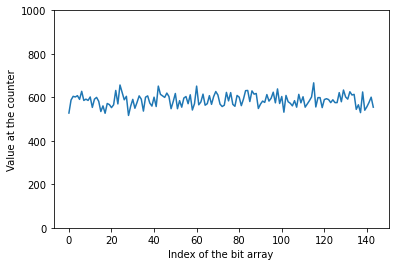

In [69]:
uniform_experiment(1, 'https://bit.ly/39MurYb')

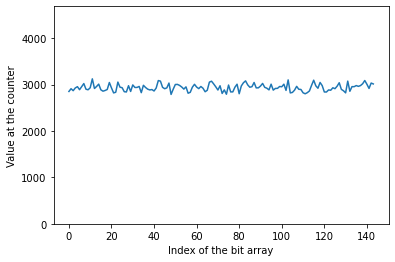

In [70]:
uniform_experiment(5, 'https://bit.ly/3we1QCp')

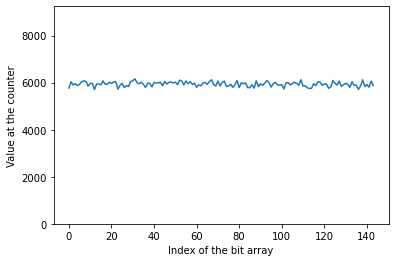

In [71]:
uniform_experiment(10, 'https://bit.ly/3vUecRn')

In [107]:
def plagiarism(text_1, text_2, window_size, fpr):
    '''
    Defines the level of plagiarism between two texts
    
    Input
    ----------
    text_1, text_2: lst
        two texts we need to check level of plagiarism between
    window_size: int
        number of words in the phrase
    fpr: float
        false-positive rate we wish our CBF to have
        
    Returns
    -------
    None
    '''
    cbf = CountingBloomFilter(fpr = fpr, num_item = len(text_1) - window_size + 1)
    prev_hash = None 
    for i in range(len(text_1) - window_size + 1):           #adding elements to the CBF
        prev_hash = cbf.insert(text_1[i:i+window_size], prev_hash)
    possible_plag = 0
    actual_plag = 0
    prev_hash = None
    for i in range(len(text_2) - window_size + 1):           #searching for repetitions
        contains, prev_hash = cbf.search(text_2[i:i+window_size], prev_hash)
        if contains:                  #in case we found a possible match, we verify whether it is plagiarims or a False Positive
            possible_plag += 1
            for j in range(len(text_1) - window_size + 1):
                if text_1[j] == text_2[i]:
                    counter1 = j+1
                    counter2 = i+1
                    while counter1 - j < window_size and counter1 < cbf.memory_size and text_1[counter1] == text_2[counter2]:
                        counter1 += 1
                        counter2 += 1
                    if counter1 - j == window_size:
                        actual_plag += 1
                else:
                    continue
    print(f"The level of plagiarism with possible False Positives is {(possible_plag/(len(text_2)-window_size+1))*100}%")
    print(f"The actual level of plagiarism is {(actual_plag/(len(text_2)-window_size+1))*100}%")  

In [108]:
url_version_1 = 'https://bit.ly/39MurYb'
url_version_2 = 'https://bit.ly/3we1QCp'
url_version_3 = 'https://bit.ly/3vUecRn'
text_1 = get_txt_into_list_of_words(url_version_1)
text_2 = get_txt_into_list_of_words(url_version_2)
text_3 = get_txt_into_list_of_words(url_version_3)

In [109]:
plagiarism(text_1, text_2, 5, 0.01)

The level of plagiarism with possible False Positives is 0.8868393047179851%
The actual level of plagiarism is 0.0%


In [110]:
plagiarism(text_1, text_2, 5, 0.05)

The level of plagiarism with possible False Positives is 4.895352962043278%
The actual level of plagiarism is 0.0%


In [111]:
plagiarism(text_1, text_2, 5, 0.1)

The level of plagiarism with possible False Positives is 10.370107603168972%
The actual level of plagiarism is 0.0%


In [112]:
plagiarism(text_1, text_3, 5, 0.01)

The level of plagiarism with possible False Positives is 0.9122807017543859%
The actual level of plagiarism is 0.0%


In [113]:
plagiarism(text_1, text_3, 5, 0.05)

The level of plagiarism with possible False Positives is 4.830409356725146%
The actual level of plagiarism is 0.0%


In [114]:
plagiarism(text_1, text_3, 5, 0.1)

The level of plagiarism with possible False Positives is 9.836257309941521%
The actual level of plagiarism is 0.0%


In [115]:
plagiarism(text_2, text_3, 5, 0.01)

The level of plagiarism with possible False Positives is 1.0292397660818713%
The actual level of plagiarism is 0.0%
